In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("../data/cleaned_movies_NEW.csv")

df = df[['revenue_adjusted', 'budget','runtime',
        'jan_release','feb_release','mar_release','apr_release','may_release',
        'jun_release','jul_release','aug_release','sep_release','oct_release',
        'nov_release','dec_release','sun_release','mon_release','tue_release',
        'wed_release','thur_release','fri_release','sat_release',
            'genre_Horror', 'genre_War',
        'genre_Adventure', 'genre_Western', 'genre_Comedy', 'genre_Mystery',
        'genre_Romance', 'genre_Science_Fiction', 'genre_Action',
        'genre_Thriller', 'genre_Crime', 'genre_TV_Movie', 'genre_Animation',
        'genre_Foreign', 'genre_Fantasy', 'genre_Drama', 'genre_Documentary',
        'genre_Family', 'genre_Music', 'genre_History','cast_size','holiday_release', 'cast_1_vote_average',
        'cast_2_vote_average', 'cast_3_vote_average', 'cast_4_vote_average', 'cast_5_vote_average',
        'keywords_holiday_celebrate', 'keywords_violence_war_crime',
        'keywords_superhero', 'keywords_creditstinger_3d',
        'keywords_womandirector_independentfilm',
        'keywords_future_robots_aliens',
        'keywords_edgy_alcohol_drug_sex_nudity', 'keywords_music',
        'keywords_animal_nature']]

df = df.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3504 entries, 0 to 3548
Data columns (total 58 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   revenue_adjusted                        3504 non-null   float64
 1   budget                                  3504 non-null   int64  
 2   runtime                                 3504 non-null   int64  
 3   jan_release                             3504 non-null   int64  
 4   feb_release                             3504 non-null   int64  
 5   mar_release                             3504 non-null   int64  
 6   apr_release                             3504 non-null   int64  
 7   may_release                             3504 non-null   int64  
 8   jun_release                             3504 non-null   int64  
 9   jul_release                             3504 non-null   int64  
 10  aug_release                             3504 non-null   int64  
 

In [5]:
df.shape

(3504, 58)

In [6]:
q = df['revenue_adjusted'].quantile(0.999)
df = df[df['revenue_adjusted'] < q]

In [7]:
df.shape

(3500, 58)

In [8]:
y = df['revenue_adjusted']
X = df.drop('revenue_adjusted', axis=1)

In [9]:
X.shape

(3500, 57)

In [10]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

with open('../saved_models/linear_regression.pkl','wb') as f:
    pickle.dump(lr, f)

#Prediction on test set
y_pred = lr.predict(X_val)
print(f"Training Score: {lr.score(X_train,y_train)}")
print(f"Validation Score: {lr.score(X_val,y_val)}")

Training Score: 0.5408700377072146
Validation Score: 0.454419122273496


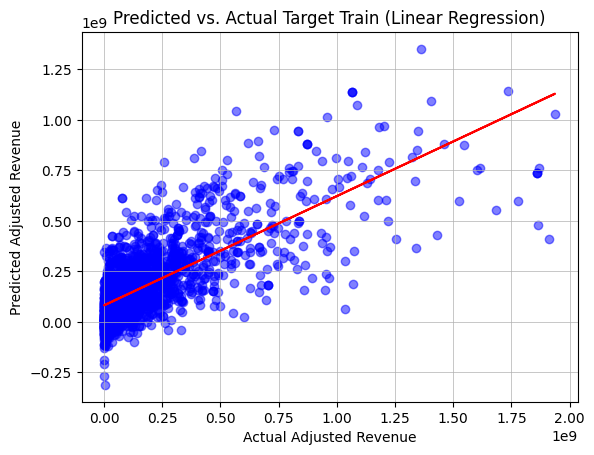

In [12]:
y_train_pred = lr.predict(X_train)
# figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue')

m, b = np.polyfit(y_train, y_train_pred, 1)

plt.plot(y_train, m*y_train + b, color='red')

plt.xlabel('Actual Adjusted Revenue')
plt.ylabel('Predicted Adjusted Revenue')
plt.title('Predicted vs. Actual Target Train (Linear Regression)')
plt.grid(linewidth=0.5)

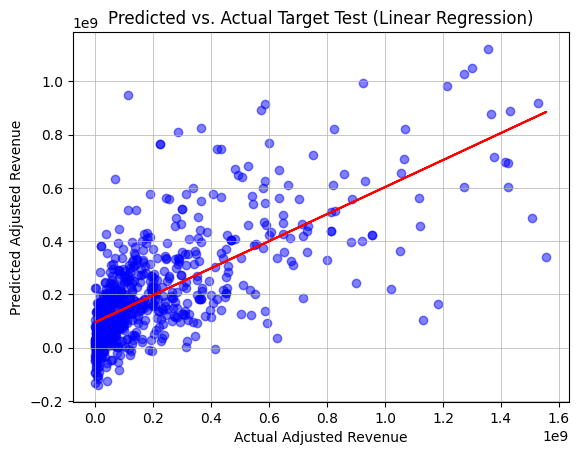

In [13]:
y_test_pred = lr.predict(X_test)
# figure(figsize=(8, 6), dpi=80)

plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')

m, b = np.polyfit(y_test, y_test_pred, 1)

plt.plot(y_test, m*y_test + b, color='red')

plt.xlabel('Actual Adjusted Revenue')
plt.ylabel('Predicted Adjusted Revenue')
plt.title('Predicted vs. Actual Target Test (Linear Regression)')
plt.grid(linewidth=0.5)

In [ ]:
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = r2_score(y_test, y_test_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

In [12]:
def linear_reg_kfold(X_train, y_train):
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
    #print Training score
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    print(f"Training Score: {round(lm.score(X_train, y_train), 9)}")

    #print Validation score
    valid_scores = cross_val_score(lm, X_train, y_train, cv=kf)
    print(f"Validation Mean Score: {round(np.mean(valid_scores), 9)}")
    return lm

linear_reg_kfold(X_train,y_train)

Training Score: 0.542268551
Validation Mean Score: 0.510110576


LinearRegression()

In [13]:
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

poly_model = LinearRegression()

poly_model.fit(X_train_poly, y_train)

print(f'Degree 2 polynomial regression validation Score: {poly_model.score(X_val_poly, y_val):.8f}')
print(f'Degree 2 polynomial regression training Score: {poly_model.score(X_train_poly, y_train):.8f}')
print(f'Degree 2 polynomial regression testing Score: {poly_model.score(X_test_poly,y_test):.8f}')

Degree 2 polynomial regression validation Score: 0.41667722
Degree 2 polynomial regression training Score: 0.69680203
Degree 2 polynomial regression testing Score: 0.44825214


In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

In [15]:
def ridge_model(X_train,y_train, regular_var = 0.5, CV_flag = False, cv_value = 5, alphavec = [0.1,0.01, 0.001]):
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
    if CV_flag is True:
        m = RidgeCV(alphas = alphavec, cv = cv_value)
        m.fit(X_train, y_train)
    
        print("Best score:", m.best_score_)
    else:
        m = Ridge(alpha = regular_var) 
        m.fit(X_train, y_train )
        
    valid_scores = cross_val_score(m, X_train, y_train, cv=kf)
    print(f"Training Score: {round(m.score(X_train,y_train), 9)}")
    print(f"Validation Mean Score: {round(np.mean(valid_scores), 9)}")
    return m

ridge_model(X_train, y_train, CV_flag=True)

/Users/dev/miniforge3/envs/cs6242-project/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.94537e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/dev/miniforge3/envs/cs6242-project/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.15461e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/dev/miniforge3/envs/cs6242-project/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.12178e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/dev/miniforge3/envs/cs6242-project/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.09273e-20): result may not be accurate.
  return linalg.solve(A, Xy, 

Best score: 0.5088556723176195
Training Score: 0.542268482
Validation Mean Score: 0.510136524


/Users/dev/miniforge3/envs/cs6242-project/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.79044e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/dev/miniforge3/envs/cs6242-project/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.07881e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/dev/miniforge3/envs/cs6242-project/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.03622e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/dev/miniforge3/envs/cs6242-project/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.196e-20): result may not be accurate.
  return linalg.solve(A, Xy, as

RidgeCV(alphas=[0.1, 0.01, 0.001], cv=5)

In [27]:
def lasso_model(X_train,y_train, regular_var = 0.5, CV_flag = False, cv_value = 5, alphavec = [0.5, 0.25, 0.1]):
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
    if CV_flag is True:
        m = LassoCV(alphas = alphavec, cv = cv_value)
        m.fit(X_train, y_train)
    else:
        m = Lasso(alpha = regular_var, normalize=True, tol=1e-2) 
        m.fit(X_train, y_train )

    valid_scores = cross_val_score(m, X_train, y_train, cv=kf)
    print(f"Training Score: {round(m.score(X_train,y_train), 9)}")
    print(f"Validation Mean Score: {round(np.mean(valid_scores), 9)}")
    return m

m= lasso_model(X_train, y_train, CV_flag=True)

/Users/dev/miniforge3/envs/cs6242-project/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.609236292521996e+18, tolerance: 1.2281252925379012e+16
  model = cd_fast.enet_coordinate_descent_gram(
/Users/dev/miniforge3/envs/cs6242-project/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6607322172999885e+19, tolerance: 1.2281252925379012e+16
  model = cd_fast.enet_coordinate_descent_gram(
/Users/dev/miniforge3/envs/cs6242-project/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.26561070346331e+19, tolerance: 1.2281252925379012e+16
  model = cd_fast.enet_coordina

Training Score: 0.542268551
Validation Mean Score: 0.510110583


/Users/dev/miniforge3/envs/cs6242-project/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.180e+19, tolerance: 1.251e+16
  model = cd_fast.enet_coordinate_descent(


In [31]:
m

LassoCV(alphas=[0.5, 0.25, 0.1], cv=5)